# Tarea 5 
### Dylan Navarro Badilla C15476
### Kevin Porras Morales C16027

# Integrales


La integral a calcular es: 

$$
I=\int_{-1}^{1} {\rm{d}}x[x^4+\sin^2(x)].
$$

Para ello primero se define una función que retorna la función a integrar:

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import legendre

def function(x): 
    return x**4 + np.sin(x)**2

Una vez teniendo la función y la bibliotecas a necesitar, se implementan los métodos para la integración numérica. 


El primer método es la suma de Riemman, dada por: 

$$
I(a, b) = \int_{a}^{b} {\rm{d}}x f(x) \approx \sum_{k=1}^{N} f(x_k) h,
$$

done $h$ corresponde al ancho del rectángulo y $f(x_k)$ es la función a integrar evaluada en el punto $x_k$, con dominio de $x$ discretizado en una grilla unidimensional, tal que $N$ corresponde al número de "pasos" que satisface $b = a + (N * h)$.


Se implementa de la siguiente manera: 

In [4]:
#Función que recibe el intervalo de integración 
#y el número de discretización:
def I_Riemman(a, b, N): 

    #Cálculo de h:
    h = (b - a) / N 
    #Variable donde se irá guardando el valor de la integral:
    integral = 0.0 
    
    #Se realiza un for loop para iterar sobre cada rectángulo e ir sumando el resultado en
    #integral:
    for i in range(N):  
        x_i = a + i * h
        integral += function(x_i) * h
    return integral

EL segundo método es el de trapezoides, para ello se tienen $N$ subregiones de ancho $h$ igual que en el método de Riemman. 

De esta manera, podemos aproximar la integral por la suma total de los trapezios. Definiendo $x_k = a + kh$, tenemos
\begin{align}
I(a, b) \approx h\left[\frac12 f(a) + \frac12f(b) + \sum_{k=1}^{N-1} f(a+kh)\right].
\end{align}


In [5]:
#Función que recibe el intervalo de integración 
#y el número de discretización:
def I_Trapezoides(a, b, N):
    
    #Cálculo de h:
    h = (b - a) / N
    #Variable donde se irá guardando el valor de la sumatoria:
    Sum = 0
    
    #Se realiza un for loop para iterar sobre cada elemento de la función evaluada en el 
    #punto a+kh y el resultado se guarda en la variable Sum:
    for k in range(N):       
        Sum += function(a+(k*h))
    return h * (1/2 * function(a) + 1/2 * function(b) + Sum) #retorna el valor de la integral

El tercer método es método Simpson, donde se utiliza la misma notación que el método anterior. La integral es dada por: 

\begin{align}
I(a,b) \approx \frac{h}3\left[f(a) + f(b) + 4\sum_{\substack{k\ impar\\ 1\dots{}N-1}}f(a+kh) + 2\sum_{\substack{k\ par \\ 2\dots{}N-2}}f(a+kh)\right].
\end{align}

In [6]:
def I_Simpson(a, b, N):
    
    #Variable donde se irá guardando el valor de la sumatoria impar:
    Sum_impar = 0
    #Variable donde se irá guardando el valor de la sumatoria par:
    Sum_par = 0
    #Cálculo de h:
    h = (b - a) / N
    
    #Se realiza un for loop para iterar sobre términos impares cada elemento de la 
    #función evaluada en el punto a+kh y el resultado se guarda en la variable Sum_impar:
    for k in range(1, N, 2):
        Sum_impar += function(a + (k * h))
        
    #Se realiza un for loop para iterar sobre términos pares cada elemento de la 
    #función evaluada en el punto a+kh y el resultado se guarda en la variable Sum_par:    
    for p in range(2, N-1, 2):
        Sum_par += function(a + (p * h))
        
    return (h/3) * (function(a) + function(b) + 4 * Sum_impar + 2 * Sum_par)

El último método es el de cuadratura Gaussiana, donde la integral es dada por: 

\begin{align}
\int_a^b {\rm{d}}x f(x) \approx \sum_{k=1}^{N+1} w_k f(x_k).
\end{align}

donde:
  * $x_k$ corresponden a las $N$ raíces (ceros) de los polinomios de Legendre $P_N(x)$ de orden $N$.
  * Los pesos se eligen tal que:
      - $\displaystyle w_k = \left[\frac{2}{1-x^2}\left(\frac{dP_N}{dx}\right)^{-2}\right]_{x={x_k}}$, con $x_k$ que cumple $P_N(x_k)=0$.
      
Para el cálculo de las raíces se utiliza el método de Newton. El método comienza con una suposición inicial y se itera con base en el algoritmo
$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.
$$
      
La implementación es la siguiente: 
  

In [7]:
def gaussxw(N):
    
    #Aproximación inicial:
    a = np.linspace(3, 4 * (N - 1), N) / ((4 * N) + 2)
    #Se implementa código vectorial:
    x = np.cos(np.pi * a + 1 / (8 * N * N * np.tan(a)))
    
    #Ahora calculamos las raíces de los polinomios utilizando el método de Newton:
    #Erro total: 
    epsilon = 1e-15
    
    delta = 1.0
    
    #FLujo de control: 
    while delta > epsilon:
        p0 = np.ones(N, dtype = float)
        #Deep copy
        p1 = np.copy(x)
        
        #Se realiza un for para iterar según el método de Newton: 
        for k in range(1, N):
            p0, p1 = p1, ((2 * k + 1) * x * p1 - k * p0) / (k + 1)
        dp = (N + 1) * (p0 - x * p1) / (1 - x * x)
        dx = p1 / dp
        x -= dx
        delta = np.max(np.abs(dx))
        
    #Ahora calculamos los pesos
    w = 2 * (N + 1) * (N + 1)/(N * N * (1 - x * x) * dp * dp)

    return x,w #retorna los puntos de muestreo obtenidos con los polinomios de Legendre

#Se implementa la siguiente rutina para que el método funcione en cualquier intervalo de a, b:
def gaussxwab(a, b, x, w):

    return 0.5 * (b - a) * x + 0.5 * (b + a), 0.5 * (b - a) * w

#Para ejecutar:
#N=2:
x2, w2 = gaussxw(2) 
#N=3:
x3, w3 = gaussxw(3) 
#N=4:
x4, w4 = gaussxw(4) 
#Pesos y puntos de muestreo para N=2:
x2r , w2r = gaussxwab(-1, 1, x2, w2)
#Pesos y puntos de muestreo para N=3:
x3r , w3r = gaussxwab(-1, 1, x3, w3)
#Pesos y puntos de muestreo para N=4:
x4r , w4r = gaussxwab(-1, 1, x4, w4)

Ahora se implementa una función para evaluar el error según el valor analítico $I_{an}$ de la integral dado por 0.945351.

In [8]:
def error(I_N, I_an = 0.945351):
    return abs((I_N - I_an) / I_an)

Ahora se implementan diversos for loop que evaluan el error al estimar la integral utilizando un determinado método con forme aumenta $N$. Estos errores se van a guardar en un array para posteriormente poder hacer el gráfico. 

In [9]:
#Error de Riemman: 
err_Riemman = np.zeros(100)

for N in range(1, 101):  
    I_N = I_Riemman(-1, 1, N)
    #Deep copy
    err = error(I_N)
    err_Riemman[N-1] = err  
    
#print(err_Riemman)    

In [10]:
#Error de Trapezoides:
err_Trapezoides = np.zeros(100)

for N in range(1, 101):  
    I_N = I_Trapezoides(-1, 1, N)
    #Deep copy
    err = error(I_N)
    err_Trapezoides[N-1] = err  

#print(err_Trapezoides)

In [11]:
#Error de Trapezoides:
err_Simpson = np.zeros(100)

for N in range(1, 101):  
    I_N = I_Simpson(-1, 1, N)
    #Deep copy
    err = error(I_N)
    err_Simpson[N-1] = err  

#print(err_Simpson)

In [13]:
#Error de Cuadratura Gaussiana: 
err_Gauss = np.zeros(100)

for N in range(1, 101):
    x, w = gaussxw(N)
    x, w = gaussxwab(-1, 1, x, w)
    I_N = np.sum(w * function(x))
    err = error(I_N)
    err_Gauss[N-1] = err

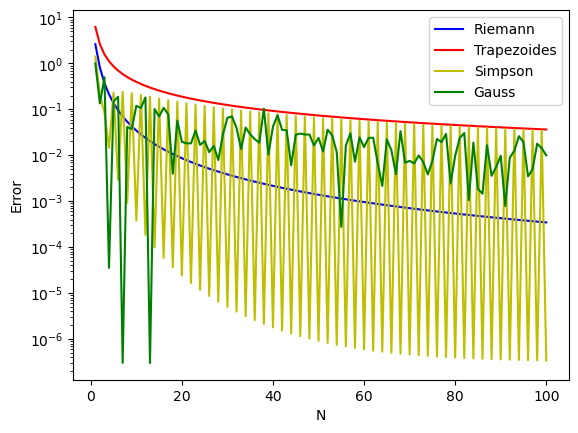

In [22]:
plt.plot(range(1, 101), err_Riemman, linestyle='-', color='b', label='Riemann')
plt.plot(range(1, 101), err_Trapezoides, linestyle='-', color='r', label='Trapezoides')
plt.plot(range(1, 101), err_Simpson, linestyle='-', color='y', label='Simpson')
plt.plot(range(1, 101), err_Gauss, linestyle='-', color='g', label='Gauss')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Error')
plt.legend()
plt.show()

# FFT


Suponga que encedemos una luz en el tiempo $t = t_{0} − \tau /2$ y la volvemos a apagar en el tiempo $t = t_{0} +\tau /2$, donde $t_{0}$ y $\tau$ son parametros constantes. La luz emitida en este periodo de tiempo tiene frecuencia $\upsilon_{0}$, la cual tambien es un parámetro constante.
El campo eléctrico emitido tiene la forma:

$$
E(t) = E_{0}e^{-2i\pi \upsilon_{0}t}   \iff   t \in C= [t_{0} − \tau /2 ,  t_{0} +\tau /2] \land E(t) = 0 \iff t \notin C
$$

El objetivo será aplicar la transformada de Fourier rápida para encontrar la expresión del campo eléctrico en el espacio de frecuencias. Vamos a evaluar númericamente:

$$
\hat E(w) = \int_{t_{0} − \tau /2}^{t_{0} +\tau /2} d\upsilon E_{0}e^{-2i\pi (\upsilon_{0}-\upsilon)t}
$$

Utilizaremos los parámetros $\tau = 1 s$, $t_{0} = 10 s$ y $\upsilon_{0} = 5 Hz $

In [23]:
import numpy as np
import matplotlib.pyplot as plt


#Declaramos una función para nuestro campo eléctrico:

def E(t):
    return np.exp(-2j * np.pi * 5 * t)

#Notese como establecí la frecuencia inicial como 5 desde el principio.
#Ahora queremos implementar la rutina para la FFT. Primero establecemos un dominio para nuestro tiempo.
def FFT(f, N, tau):
    times = np.linspace(10 - tau/2 , 10 + tau/2, N)

    #Transformamos:
    Fourier_t = np.fft.fft(f(times), norm= 'forward')

    #Utilizamos Numpy para evaluar nuestras frecuencias en el dominio requerido.

    w = np.fft.fftfreq(len(Fourier_t), d = times[1] - times[0])

    return w, Fourier_t, times

#invocamos nuestros resultados con los parámetros deseados.

W, Transformada, times = FFT(E, 4096, 1)


#A su vez, necesitamos la colección de datos de la función en el espacio de configuración.

E_i = E(times)




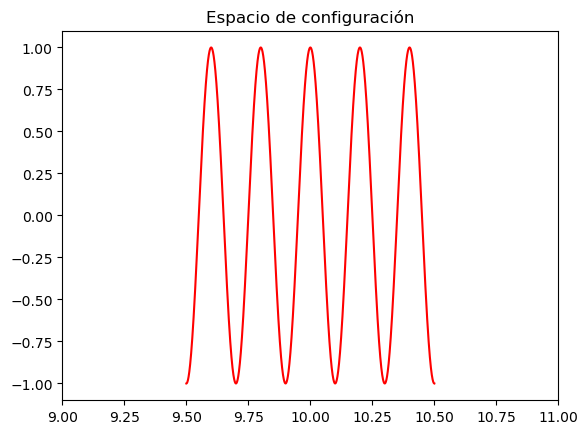

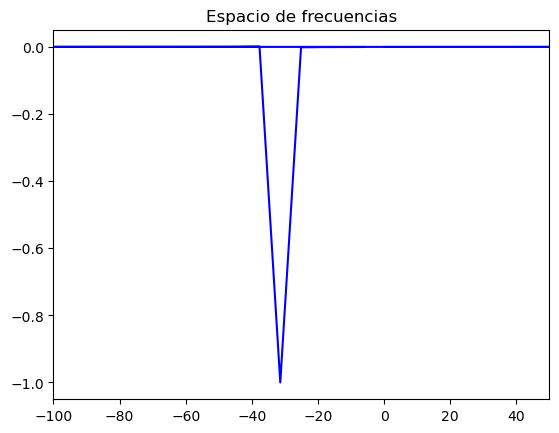

In [24]:
#Graficamos la parte real del espacio de configuración y el espacio de frecuencias:
plt.xlim(9.0,11)
plt.title('Espacio de configuración')
plt.plot(times, np.real(E_i), color = 'r')
plt.show()

plt.xlim(-100,50)
plt.title('Espacio de frecuencias')
plt.plot(W * 2 * np.pi , np.real(Transformada), color = 'b')
plt.show()





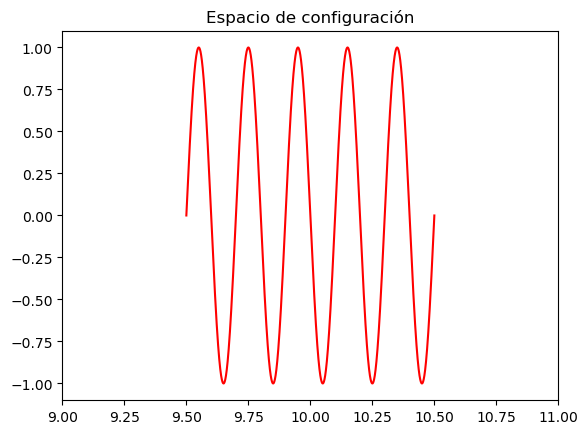

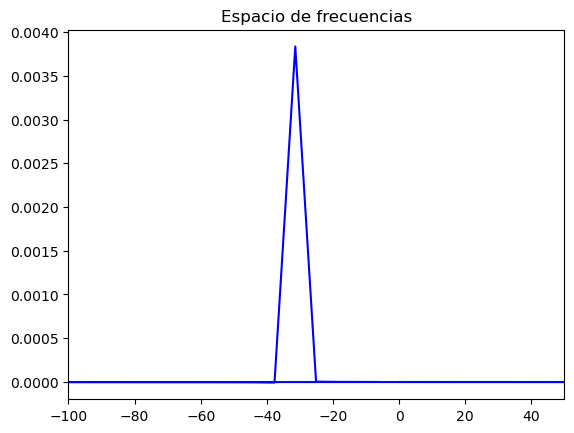

In [25]:
#Graficamos la parte imaginaria del espacio de configuración y el espacio de frecuencias:
plt.xlim(9.0,11)
plt.title('Espacio de configuración')
plt.plot(times, np.imag(E_i), color = 'r')
plt.show()

plt.xlim(-100,50)
plt.title('Espacio de frecuencias')
plt.plot(W * 2 * np.pi , np.imag(Transformada), color = 'b')
plt.show()

## ¿Porque utilizamos potencias de 2?
Cuando $N$ es una potencia de 2, se puede dividir recursivamente en dos partes iguales, es decir, secuencias de longitud $N/2$. Este proceso continúa hasta llegar a secuencias de longitud 1, donde la DFT de una secuencia de un solo punto es simplemente el punto en sí mismo.

Esto es gracias a que el algoritmo más usual utilizado para la FFT es el algoritmo llamado Cooley-Tukey o también conocido como "dividir y conquistar". El hecho de utilizar potencias de 2 implica que el error crece en orden de $O(N log(N))$ en lugar de $O(N^2), lo cual es una mejora excesivamente buena.

## ¿Qué pasa si disminuimos o incrementamos el valor de τ?

In [26]:
#Podemos graficar las partes reales e imaginarias de nuevo, haciendo un grid e intentar entender de manera cualitativa el comportamiento de la señal.
#Invoquemos distintos resultados!
W1, Transformada1, times1 = FFT(E, 4096, 1)  # tau = 1 s
E1 = E(times1)

W2, Transformada2, times2 = FFT(E, 4096, 0.1) # tau = 0.1 s
E2 = E(times2)

W3, Transformada3, times3 = FFT(E, 4096, 10) # tau = 10 s
E3 = E(times3)

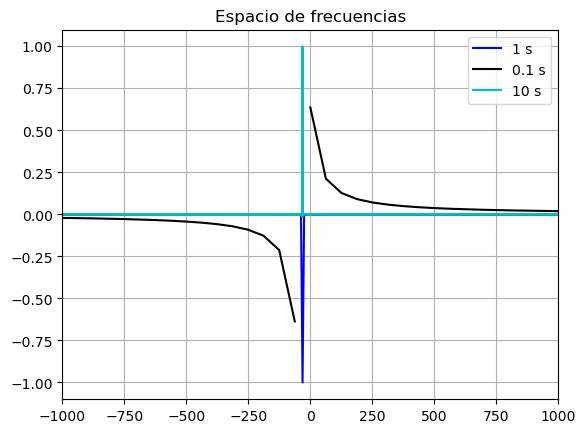

In [27]:
#Graficamos las partes real en el espacio de frecuencias.
plt.xlim(-1000,1000)
plt.title('Espacio de frecuencias')
plt.plot(W1* 2 * np.pi, np.real(Transformada1),color = 'b', label = '1 s')
plt.plot(W2* 2 * np.pi, np.real(Transformada2),color = 'k', label = '0.1 s')    #Espacio de frecuencias
plt.plot(W3* 2 * np.pi, np.real(Transformada3),color = 'c', label = '10 s')

plt.legend()
plt.grid()
plt.show()


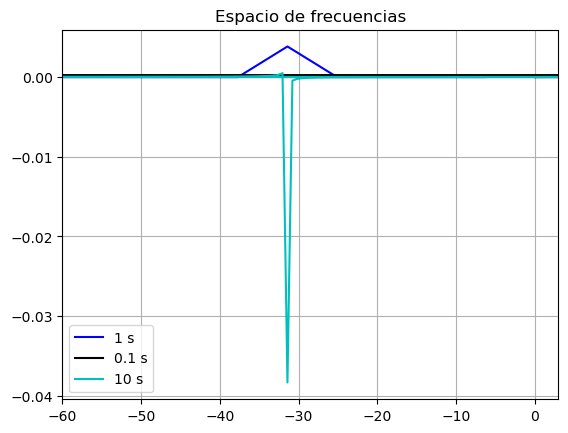

In [28]:
#Graficamos las partes imaginaria en el espacio de frecuencias.
plt.xlim(-60,3)
plt.title('Espacio de frecuencias')
plt.plot(W1* 2 * np.pi, np.imag(Transformada1),color = 'b', label = '1 s')
plt.plot(W2* 2 * np.pi, np.imag(Transformada2),color = 'k', label = '0.1 s')    #Espacio de frecuencias
plt.plot(W3* 2 * np.pi, np.imag(Transformada3),color = 'c', label = '10 s')

plt.legend()
plt.grid()
plt.show()



Es importante notar que, al no cambiar la frecuencia característica del problema $\upsilon_{0}$ el delta de dirac en la transformada se "activa" en el mismo punto, pero a medida que hacemos $\tau$ más y más grande ese impulso se hace cada vez más rápido, por lo que intuimos que la onda característica del campo eléctrico va a tener una longitud de onda mucho más pequeña y por ende su frecuencia va a ser mayor. A su vez, es interesante ver como para un $\tau$ de orden pequeño la parte imaginaria es basicamente nula.